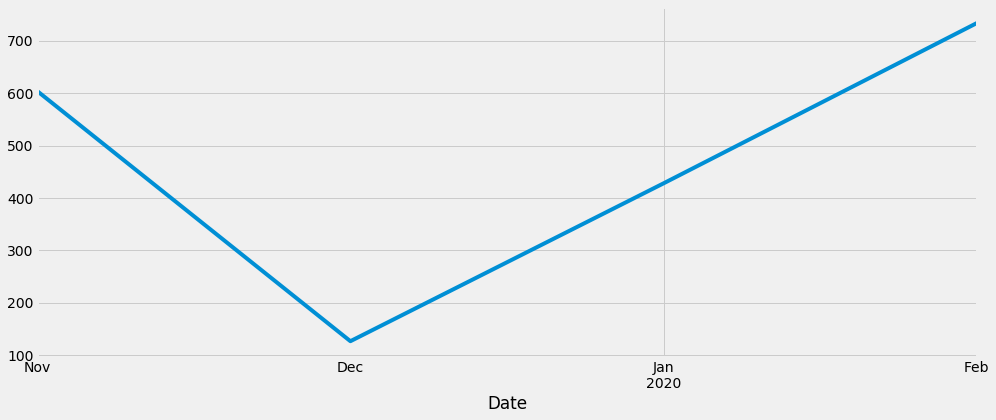

In [1]:
#importing the necessary libraries.
#All these libraries are generally pre-installed in the anaconda Machine learning platforrm provider.
#One can also make use of the google colab by simply uploading the dataset into the same working directory in the drive where
#the notebook (.ipynb file) is stored in the drive.

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm




df = pd.read_excel("F:/ml/minor project/dataset.xlsx")

cols = ['AT', 'WS', 'RH', 'BP', 'SR']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('Date')


df.isnull().sum()

df = df.groupby('Date')['Energy (Meters)'].sum().reset_index()

df = df.set_index('Date')
df.index

y = df['Energy (Meters)'].resample('MS').mean()


y.plot(figsize=(15, 6))
plt.show()

In [2]:
"""ARIMA (Auto Regressive Integrated Moving Average) can work over 'Non-seasonal' and pattern making.
p: Order of the AR(Auto Regressive) term.
d:number of differencing required to make the time series.
q: Order of the MA(Moving Average) term.

ARIMA is basically a linear regression model which uses its own lags as predictors.
AIC = Akaieke Information criterion"""
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

#print('Examples of parameter combinations for Seasonal ARIMA...')
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

t = -1000;


import warnings
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            if t<results.aic:
                t = results.aic
                odr = param
                sodr = param_seasonal

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
print('ARIMA{}x{}12 - AIC:{}'.format(odr, sodr, t))       
mod = sm.tsa.statespace.SARIMAX(y,
                                order=odr,
                                seasonal_order=sodr,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()


#results.plot_diagnostics(figsize=(16, 8))
#plt.show()

print(results.summary().tables[1])

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:47.75019380172874
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:30.53409619153592
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 1, 1, 12)1

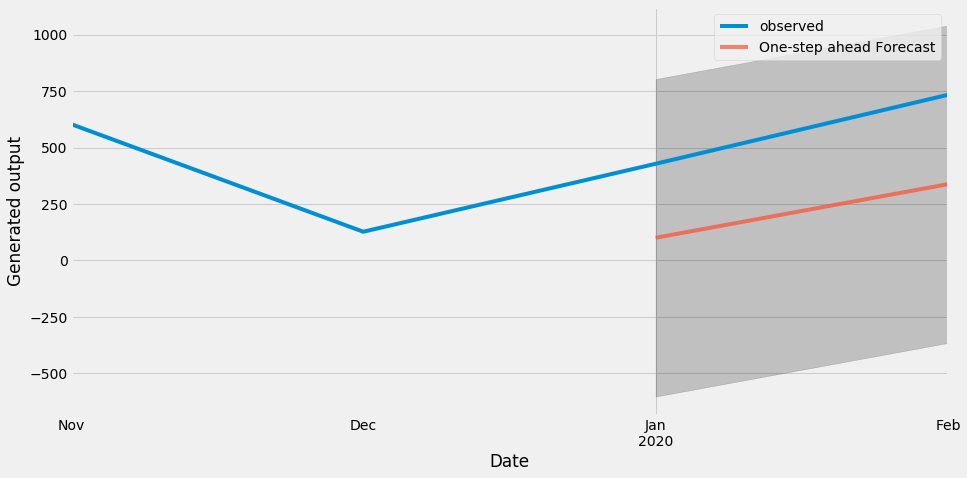

In [3]:
#Verification of the prediction
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Generated output')
plt.legend()

plt.show()

In [4]:
#Calculating the Mean Squared error(MSE) & Root Mean Squared Error (RMSE).
y_forecasted = pred.predicted_mean
y_truth = y['2020-02-01':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))




The Mean Squared Error of our forecasts is 156688.43
The Root Mean Squared Error of our forecasts is 395.84


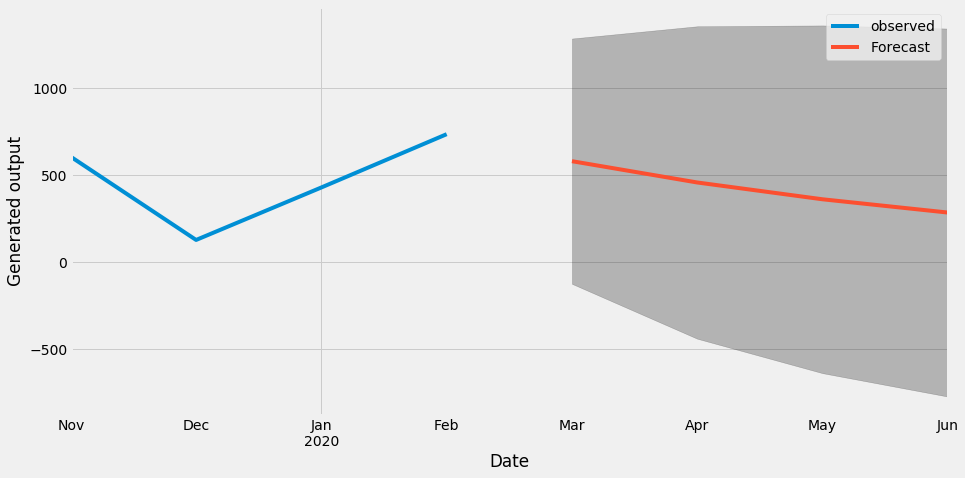

In [5]:
#prediction of the data 
pred_uc = results.get_forecast(steps=4)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Generated output')

plt.legend()
plt.show()